This notebook illustrates the Discrete Fourier Transformation (DFT) for different time series. 

The coefficients of the DFT are one of the many features in *tsfresh*.

---

# Some theoretical background

If we see a series of length $n$ - without timestamps - we don't have any idea about the time domain: In what time was the series recorded? What is the timedelta between 2 observations? The only thing we know (or, more realistic, assume) is that the series is uniformly sampled through time. Of course, with the knowledge of the sampling frequency, one can draw conclusions about the real frequencies in the time domain. But `tsfresh` does not incorporate this information.

Therefore, in Discrete Fourier Transform (DFT), "frequencies" are expressed in terms of "fractions of series length", $2\pi k/n$, $k=0, ..., n-1$. One can read it as "$2\pi k$ divided on $n$ points" or "$k$ periods of length $2\pi$ divided on $n$ points" or "$k$ cycles among $n$ points". At "time" $m \in \lbrace0, ..., n-1\rbrace$, the value  $a_m$ is observed. 

The definition used in the implementation in `np.fft` is (picture from numpy docs):
![Definition in implementation np.fft](https://docs.scipy.org/doc/numpy/_images/math/60627d7b56cbf58e87ccb5c3ee92a36ebccc62f5.png)

with $a_m$ being the (possibly complex) value of the series at position $m$ and the series length $n$. $a_m$ is multiplied with the complex number on the angle $2\pi k m/n$ (in rad not deg measure) on the unit circle. The following picture shows how the complex exponential function rotates among the unit circle / shows "Euler's Theorem" (figure taken from Wikipedia):

![Euler's Theorem on the unit circle](https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Euler%27s_formula.svg/180px-Euler%27s_formula.svg.png)

The resulting coefficients $A_k$ can be drawn on a complex pane, too (figure from Wikipedia):
![The resulting FFT coefficient is complex](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Complex_number_illustration_modarg.svg/220px-Complex_number_illustration_modarg.svg.png)


The absolute value $r$ of the complex DFT coefficient corresponds to the amplitude of the oscillation, and the angle $\phi$ corresponds to the phase.

It is stated in [Wikipedia](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Definition) (Notation is modified):
> It's amplitude and phase are 
>
> $|A_k|$ / $n $ and $arctan(Im(A_k), Re(A_k))$

Note the **normalization of the Amplitude with the series length $n$**.

Remember when proceeding:

- The normalized fourier coefficient (via $1/n$) reflects the amplitude
- we look at sinusoid frequencies with an integer amount of cycles in the series

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from numpy.fft import rfft
sns.set_style("whitegrid")

In [2]:
def plot_x_and_rfft(x, fft_coeffs):
    fft = fft_coeffs
    plt.figure(figsize=(12, 4))
    
    plt.subplot(211)
    plt.title("Time Series")
    plt.plot(x)
    
    plt.subplot(212)
    plt.plot(fft.real, label="real", marker="o")
    plt.plot(fft.imag, label="imag", marker="o")
    plt.plot(np.abs(fft), label="abs", marker="o")
    plt.title("Real, imaginary and absolute part of DFT coefficients A(k)")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Compose a Signal With up to 14 Periods of Cos Included

Let's compose a series as the sum of some cosine waves with different frequencies.

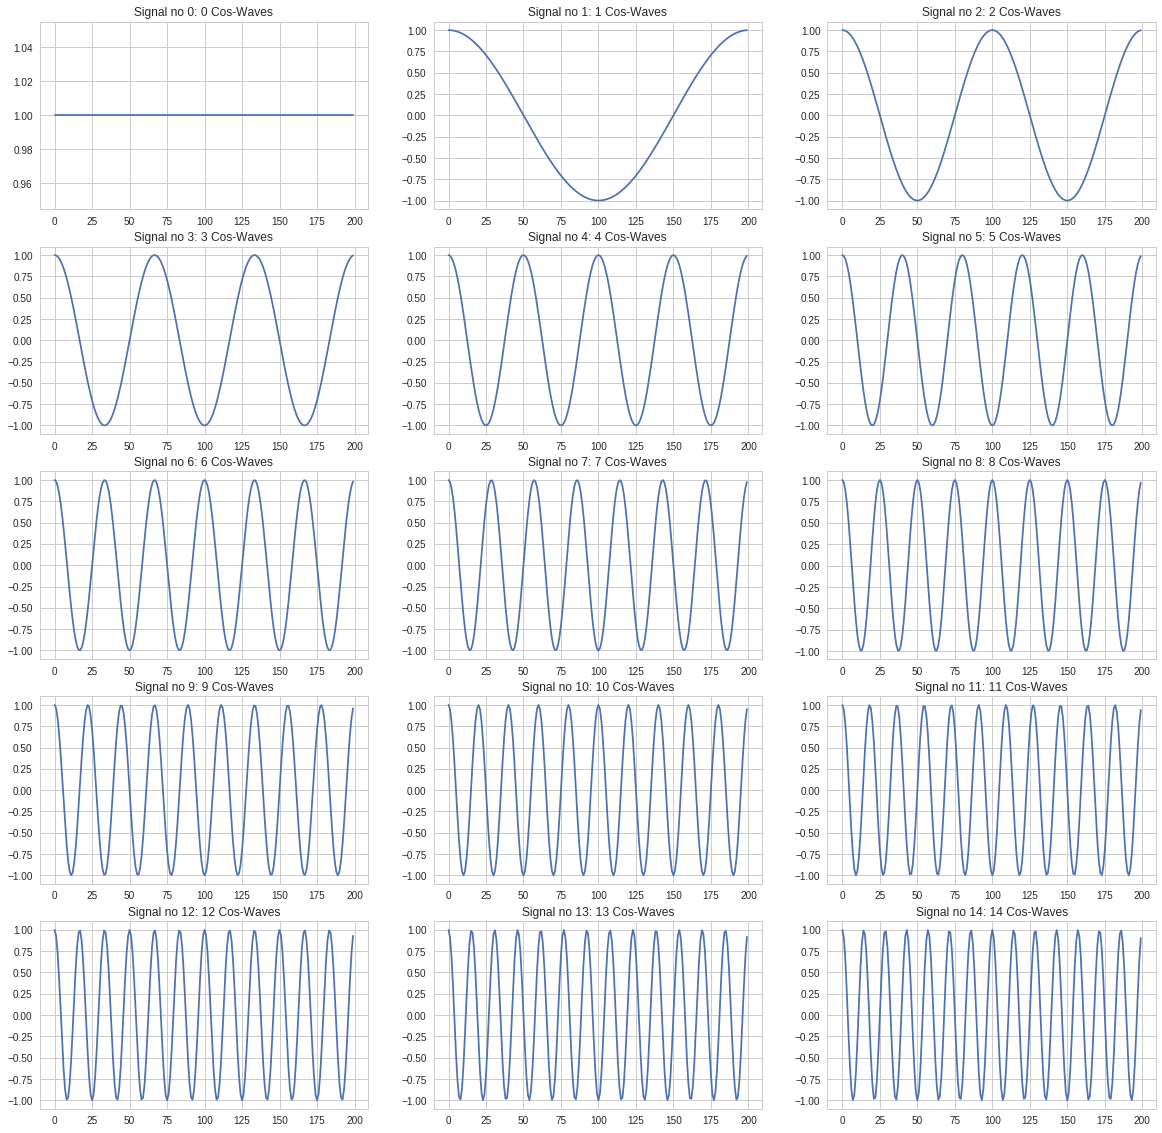

In [3]:
n = 200  # no of samples
m = np.linspace(0, 1, n, endpoint=False)  # the results differ with the defaul endpoint=True
x = np.zeros(n)
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5, 3, i+1)
    # the results differ with the defaul endpoint=True
    cos_wave = np.cos(np.linspace(0, i*2*np.pi, n, endpoint=False))
    plt.title("Signal no {}: {} Cos-Waves".format(i,i))
    plt.plot(cos_wave)
    x = x + cos_wave
plt.show()

The analytical solution of the DFT is:

- Amplitude (i.e. absolute value) is 1 for the first 15 coefficients
- angle, i.e. phase, should be 0 deg for the first 15 coefficients

In [4]:
fft_coeffs = rfft(x)
amp_deg = tuple(zip(range(20), np.abs(fft_coeffs)[:20], np.angle(fft_coeffs, deg=True)[:20]))
print("No \t Abs.Value \t Abs.Value/N \t angle in deg")
for no, amp, deg in amp_deg:
    print("{:d} \t {:f} \t {:f} \t {:4.2f}".format(no, amp, amp / n, deg))

No 	 Abs.Value 	 Abs.Value/N 	 angle in deg
0 	 200.000000 	 1.000000 	 0.00
1 	 100.000000 	 0.500000 	 0.00
2 	 100.000000 	 0.500000 	 -0.00
3 	 100.000000 	 0.500000 	 -0.00
4 	 100.000000 	 0.500000 	 0.00
5 	 100.000000 	 0.500000 	 -0.00
6 	 100.000000 	 0.500000 	 -0.00
7 	 100.000000 	 0.500000 	 -0.00
8 	 100.000000 	 0.500000 	 0.00
9 	 100.000000 	 0.500000 	 -0.00
10 	 100.000000 	 0.500000 	 -0.00
11 	 100.000000 	 0.500000 	 -0.00
12 	 100.000000 	 0.500000 	 -0.00
13 	 100.000000 	 0.500000 	 0.00
14 	 100.000000 	 0.500000 	 -0.00
15 	 0.000000 	 0.000000 	 -50.74
16 	 0.000000 	 0.000000 	 -120.06
17 	 0.000000 	 0.000000 	 -47.79
18 	 0.000000 	 0.000000 	 -57.17
19 	 0.000000 	 0.000000 	 -4.00


If you use `np.linspace` with `endpoint=True` in the signal generation, you won't get the correct results.

So the amplitude for the 0th Fourier coefficient - which corresponds to the constant 1 - is correct. **But obviously, all the other amplitudes are wrong. Moreover, they are consistently half of the correct amplitude. Why is this the case?**

I won't go into detail here, but it is because the [output of the DFT - in case of a real valued elements $a_m$ - is symmetric](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#The_real-input_DFT). This means that an investigated "frequency" is splitted among two $k$ values, and so is the amplitude (not for $k=0$). For example:

In [5]:
%%latex
\begin{align}
k=1:&\quad 1 \cdot 2\pi\frac{m}{n}\\
k=n-1:&\quad (n-1) \cdot 2\pi\frac{m}{n} = 2\pi m - 2\pi \frac{m}{n}\\
\end{align}

<IPython.core.display.Latex object>

The term $2\pi m$ with $m$ being an integer has no effect, and so both deliver the same results but rotate in the different direction on the unit circle. In this case, the amplitude of this "one-period oscillation" is splitted among $k=1$ and $k=n-1$.
The special case of real-valued input is exploited by the `np.fft.rfft` function, which returns only `N/2` values. When using the "normal" `np.fft.fft` function, one can see the symmetry in the plot:

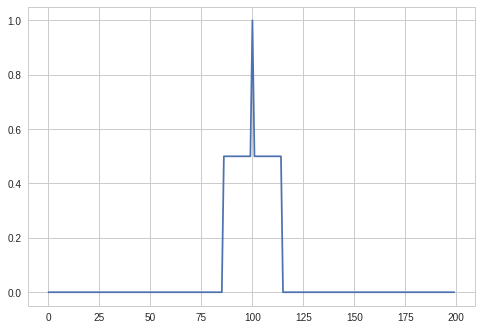

In [6]:
plt.plot(np.abs(np.fft.fftshift(np.fft.fft(x))) / n)
plt.show()

I needed the `np.fft.fftshift` function to reorder the coefficients axis. Be aware that the x-axis labels do not correspond to the values of k! If you are interested in this subject, please search the web for the symmetry of the DFT transform.

# Use Normalization to get Amplitude Information

There is a difference in the implementations in `np.fft` and `scipy.fftpack`: NumPy provides the normalization flag, whereas `fftpack` does not.
But be aware: **The normalization does not yield true amplitudes**, because the normalization is done by $1 / \sqrt{n}$. Correct amplitudes can be calculated by multiplication with $1/n$. However, this normalization is sufficient to compare timeseries with different length.

Unnormalized


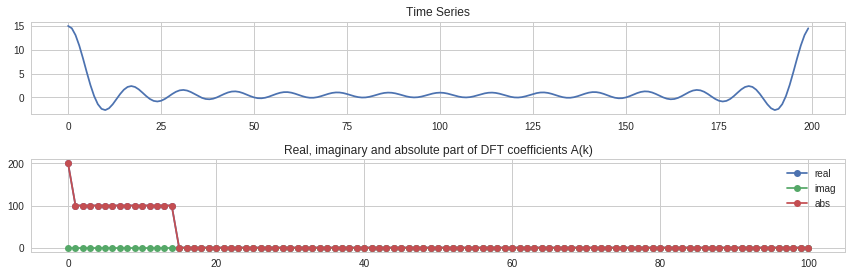

Normalized with 1 / sqrt(N)


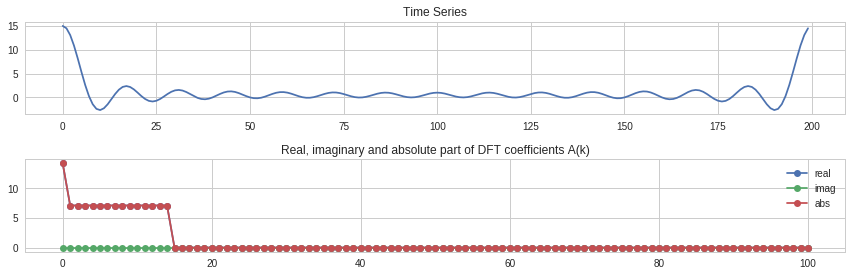

In [7]:
print("Unnormalized")
plot_x_and_rfft(x, rfft(x))
print("Normalized with 1 / sqrt(N)")
plot_x_and_rfft(x, rfft(x, norm="ortho"))

For correct resampling via `irfft` to the time domain, the normalization flag in `rfft` and `irfft` must be equal (None or "ortho").

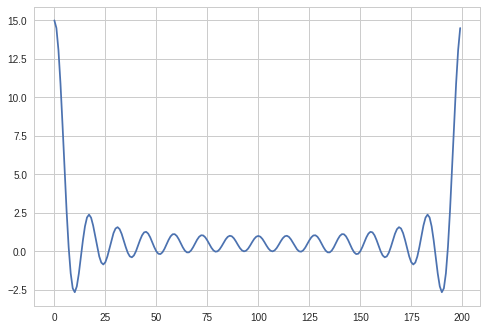

In [8]:
plt.plot(np.fft.irfft(rfft(x, norm="ortho"), norm="ortho"))
plt.show()

# Resampling With Coefficients k>=10 Rejected

What happens if one tries to resample the signal from the first 10 coefficients only and discard the rest? How does the plot look like?

In [9]:
fft_coeffs = rfft(x, norm="ortho")
trunc_fft_coeffs = np.ones(len(fft_coeffs)) * 0+0j
trunc_fft_coeffs[0:10] = fft_coeffs[0:10]
trunc_fft_coeffs[0:15]  # the remaining entries are zero

array([ 14.14213562 +0.00000000e+00j,   7.07106781 +1.93774590e-15j,
         7.07106781 -1.72812614e-15j,   7.07106781 -5.70583545e-15j,
         7.07106781 +4.21786636e-15j,   7.07106781 -3.98762969e-15j,
         7.07106781 -1.21015308e-14j,   7.07106781 -6.01337816e-15j,
         7.07106781 +6.47656704e-15j,   7.07106781 -5.10788198e-15j,
         0.00000000 +0.00000000e+00j,   0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,   0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j])

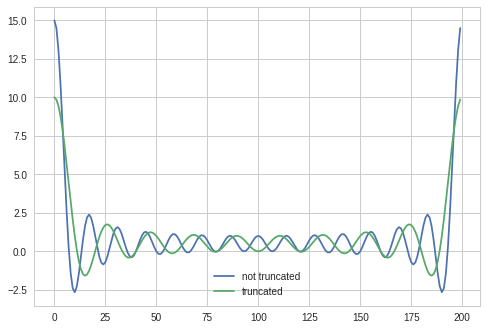

In [10]:
plt.plot(np.fft.irfft(fft_coeffs, norm="ortho"))  # plot resampled with all coefficients
plt.plot(np.fft.irfft(trunc_fft_coeffs, norm="ortho"))  # plot resampled with truncated coefficients
plt.legend(["not truncated", "truncated"])
plt.show()

We see an information loss without these coefficients. It is left to the feature engineer how many coefficients he takes into account.

# What about a non-integer amount of cycles?

Truncate the time series from above. The number of cycles is not integer any more.

In [11]:
y = x[0:-50]  # length is now 150, some periods are not integer any more

Unnormalized


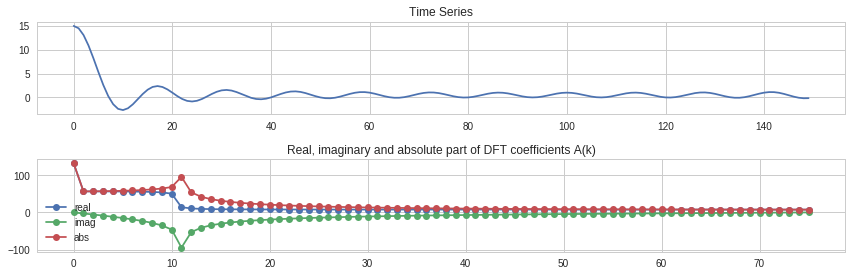

Normalized with 1 / sqrt(N)


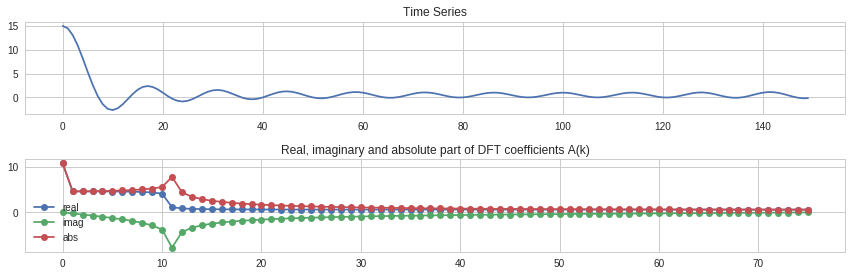

In [12]:
print("Unnormalized")
plot_x_and_rfft(y, rfft(y))
print("Normalized with 1 / sqrt(N)")
plot_x_and_rfft(y, rfft(y, norm="ortho"))

About the first 11 coefficients seem to be important. Plot the inverted coefficients / resampled signal.

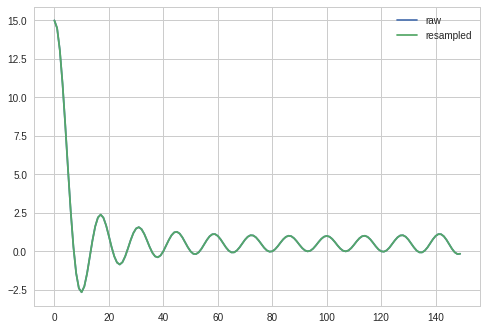

In [13]:
plt.plot(y)
plt.plot(np.fft.irfft(rfft(y, norm="ortho"), norm="ortho"))
plt.legend(["raw", "resampled"])
plt.show()

We do not have an analytical description of the signal any more, but it seems that it is perfectly described by the DFT coefficients, as it can be resampled without an error.

# Signal Corrupted With Noise

In [14]:
noise = np.random.normal(loc=0.0, scale=1, size=200)

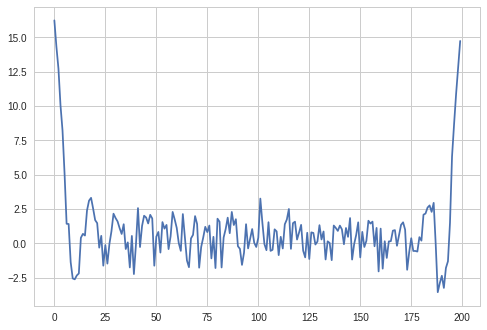

In [15]:
x_with_noise = x + noise
plt.plot(x_with_noise)
plt.show()

Whoosh, this signal seems corrupted. What are the results of the DFT?

Unnormalized


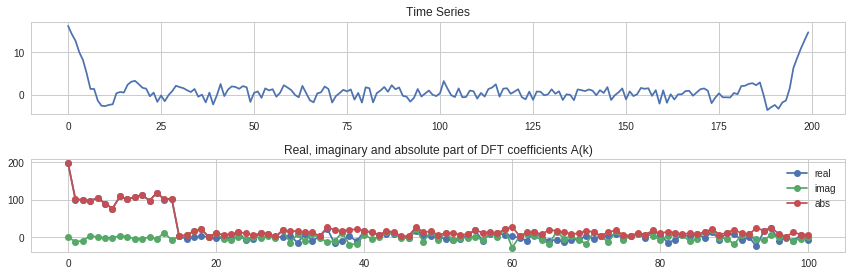

Normalized with 1 / sqrt(N)


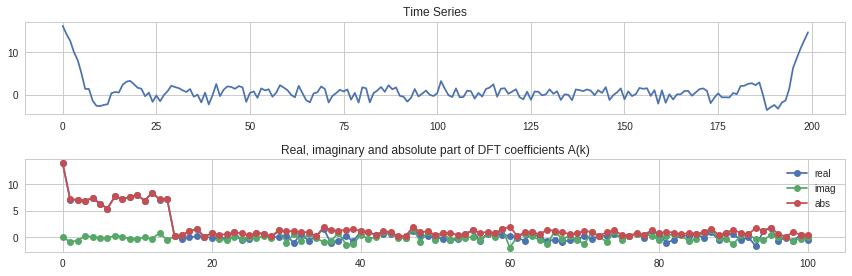

In [16]:
print("Unnormalized")
plot_x_and_rfft(x_with_noise, rfft(x_with_noise))
print("Normalized with 1 / sqrt(N)")
plot_x_and_rfft(x_with_noise, rfft(x_with_noise, norm="ortho"))

With this small amount of noise, one can still see the importance of the first 15 DFT coefficients. With more noise (i.e. a larger stddev), the result gets, unsurprisingly, worse.

# Pure noise

How is Gaussian / white noise treated by the DFT?

In [17]:
noise = np.random.normal(loc=0.0, scale=1, size=200)

Unnormalized


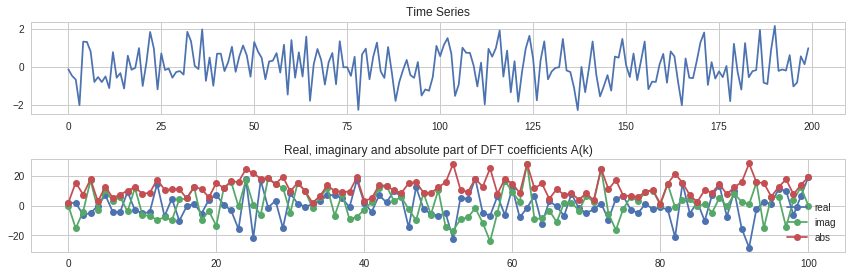

Normalized


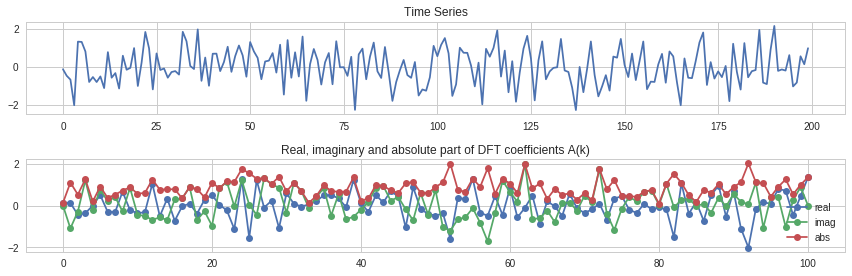

In [18]:
print("Unnormalized")
plot_x_and_rfft(noise, rfft(noise))
print("Normalized")
plot_x_and_rfft(noise, rfft(noise, norm="ortho"))

For a random noise, all coefficients seem to be relevant. There seems to be no pattern.

# Polynomial Signal

In [19]:
z = np.linspace(-1, 1, n, endpoint=False)
polynomial = z + z**2 - z**3 + z**4 - z**5  # some random composition

Unnormalized


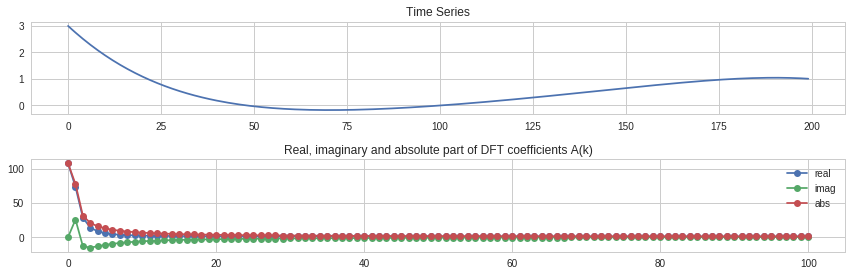

Normalized with 1 / sqrt(N)


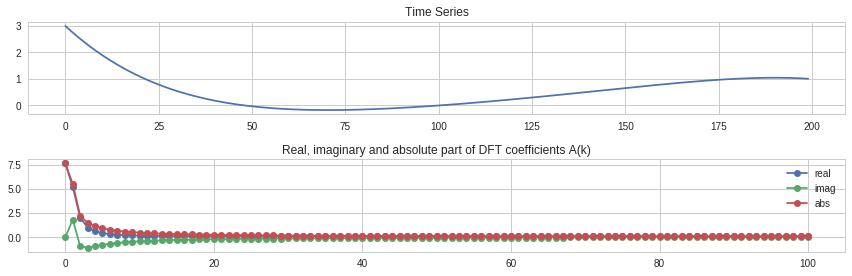

In [20]:
print("Unnormalized")
plot_x_and_rfft(polynomial, rfft(polynomial))
print("Normalized with 1 / sqrt(N)")
plot_x_and_rfft(polynomial, rfft(polynomial, norm="ortho"))

Discard all DFT coefficients with k >= 10 and k >= 5 and plot the resampling results.

In [21]:
fft_coeffs = rfft(polynomial, norm="ortho")
trunc_fft_coeffs_10 = np.ones(len(fft_coeffs)) * 0+0j
trunc_fft_coeffs_5 = np.ones(len(fft_coeffs)) * 0+0j
trunc_fft_coeffs_10[0:10] = fft_coeffs[0:10]
trunc_fft_coeffs_5[0:5] = fft_coeffs[0:5]

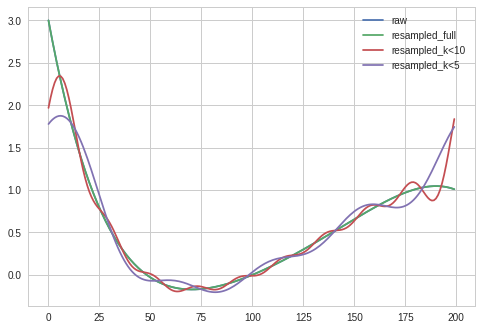

In [22]:
plt.plot(polynomial)
plt.plot(np.fft.irfft(rfft(polynomial, norm="ortho"), norm="ortho"))
plt.plot(np.fft.irfft(trunc_fft_coeffs_10, norm="ortho"))
plt.plot(np.fft.irfft(trunc_fft_coeffs_5, norm="ortho"))
plt.legend(["raw", "resampled_full", "resampled_k<10", "resampled_k<5"])
plt.show()

This looks quite interesting. 

# Conclusion

- The DFT k=1 coefficient correlates the signal to an oscillation with 1 period in the signal, the k=2 coefficient correlates it to an oscillation with 2 periods in the signal, and so on
- If you want you can make the statement: Taking the first DFT coefficients corresponds to a *lowpass* behavior, taking the last DFT coefficients corresponds to a *highpass* behavior, and you can realize whatever bandpass you want by picking the coefficients of interest
- Discrete Fourier Transformation (DFT) is not restricted to obviously periodic signals
- White noise can be seen on all "frequencies"
- If the input signal is real valued, one can exploit the symmetrie of the DFT coefficients
- If one is interested to compare amplitudes among time series with different lengths, one needs to normalize the FFT coefficients by time series length
- It is left to the feature engineer to pick the interesting coefficients
- If you are interested in the symmetry of the DFT and the important but unmentioned [Nyquist Frequency](https://en.wikipedia.org/wiki/Nyquist_frequency), you can find many valuable resources in the wild world wide web